# Deep Learning HW3: Perceptrons and Logistic Regression
**Written by Akwasi D. Akwaboah** <br>
**First Date:** 03/30/2021 <br>
**Description:** Implementation of C-class classification using C perceptrons and C  logistic regression models

In [23]:
#Data load: http://rasbt.github.io/mlxtend/user_guide/data/loadlocal_mnist/
from mlxtend.data import loadlocal_mnist
import platform

if not platform.system() == 'Windows':
    X_tr, y_tr = loadlocal_mnist(
            images_path='Data_extract/train-images-idx3-ubyte', 
            labels_path='Data_extract/train-labels-idx1-ubyte')
    X_te, y_te = loadlocal_mnist(
            images_path='Data_extract/t10k-images-idx3-ubyte', 
            labels_path='Data_extract/t10k-labels-idx1-ubyte')

else:
    X_tr, y_tr = loadlocal_mnist(
            images_path='Data_extract/train-images.idx3-ubyte', 
            labels_path='Data_extract/train-labels.idx1-ubyte')
    X_te, y_te = loadlocal_mnist(
            images_path='Data_extract/t10k-images.idx3-ubyte', 
            labels_path='Data_extract/t10k-labels.idx1-ubyte')
    

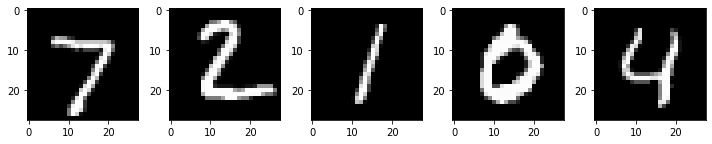

In [190]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
for i in range(5):
    img = (np.reshape(X_te[i,:], (28, 28)))
    plt.subplot(151+i)
    plt.imshow(img, cmap = plt.cm.gray)
plt.tight_layout()
plt.savefig('MNIST.png')
    

In [24]:
print('Train Data: Dimensions: {}'.format(X_tr.shape))
print('Test Data: Dimensions: {}'.format(X_te.shape))

Train Data: Dimensions: (60000, 784)
Test Data: Dimensions: (10000, 784)


## 1. Perceptrons

In [147]:
import numpy as np
TRAIN_SIZE = 20000
TEST_SIZE = 2000
X_train = np.zeros((TRAIN_SIZE, X_tr.shape[1]+1))
X_train[:,0] = 1
# print(np.unique(X_train[0,:]))
X_train[:, 1:] = X_tr[:TRAIN_SIZE,:]
# print(np.unique(X_train[0,:]))
y_train = y_tr[:TRAIN_SIZE]

X_test = np.zeros((TEST_SIZE, X_te.shape[1]+1))
X_test[:,0] = 1
X_test[:, 1:] = X_te[:TEST_SIZE,:]
y_test = y_te[:TEST_SIZE]

#First binarize the labels (1-hot encoding)
Train_Labels = np.zeros((TRAIN_SIZE, 10)) #Each column is class label for a perceptron classifier
for i in range(10):
    Train_Labels[:, i] = np.where(y_train == i, 1, 0)

In [141]:
def sign(z):
    y = np.where(z > 0, 1, 0)
    return y
    
#Training the Perceptron
def train_perceptron(train_data, truths, alpha, epochs, batch_size): #alpha = learning rate
    theta = np.zeros(train_data.shape[1]) #initialize weights at zero
    print('------------Training Begun!------------')
    for epoch in range(epochs):
        for i in range(np.uint(TRAIN_SIZE/batch_size)):
            z_i = np.matmul(X_train[i*batch_size: (i+1)*batch_size, :], theta)
            y_hat = sign(z_i)
#             print(y_hat)
            
            #update weight
            theta = theta + alpha*sum(((truths[i*batch_size: (i+1)*batch_size] - y_hat)*X_train[i*batch_size: (i+1)*batch_size, :].T).T)
#         print('******Epoch {} done ********'.format(epoch))
    print('-------------Training Done!------------')
    return theta
#predict
def predict_perceptron(test, weights):
    score = np.matmul(test, weights)
    y_pred = sign(score)
    return y_pred, score

# recognition rate
def clf_score(y_predt, y_test):
    Apt_Class_idx = []
    Apt_Class_label = []
    for i in np.arange(len(y_predt)):
        if (y_predt[i] == y_test[i]).all():
            Apt_Class_idx.append(i)
            Apt_Class_label.append(y_predt[i])
    Cls_acc = (len(Apt_Class_idx)/len(y_test))
    print('Classification Accuracy :', Cls_acc)
    return Cls_acc, Apt_Class_idx, Apt_Class_label

In [116]:
weights = train_perceptron(X_train, Train_Labels[:,7], 0.001, 2, 1)
print(weights.shape)

------------Training Begun!------------
-------------Training Done!------------
(785,)


In [117]:
y_pred, score = predict_perceptron(X_test[0,:], weights)
print('y_pred: ', y_pred)
print('score: ', score)
print('Truth: ', y_test[0])

y_pred:  1
score:  8089.437999999998
Truth:  7


In [120]:
#Train 10 perceptrons
n_classes = 10
weights_arr = np.zeros((n_classes, X_train.shape[1]))
for c in range(n_classes):
    print('Perceptron {}: '.format(c))
    weights_arr[c, :] = train_perceptron(X_train, Train_Labels[:,c], 0.001, 10, 1)

Perceptron 0: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 1: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 2: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 3: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 4: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 5: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 6: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 7: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 8: 
------------Training Begun!------------
-------------Training Done!------------
Perceptron 9: 
------------Training Begun!------------
-------------Training Done!------------


In [121]:
y_pred_arr = np.zeros((TEST_SIZE, n_classes))
score_arr = np.zeros((TEST_SIZE, n_classes))

for test_idx in range(TEST_SIZE):
    for i in range(n_classes):
        y_pred_arr[test_idx, i], score_arr[test_idx, i] = predict_perceptron(X_test[test_idx,:], weights_arr[i,:])

# print('y_pred: \n', y_pred_arr[0:10])
# # print('score: \n', score_arr[0:10])
# print('Truth: \n', y_test[0:10])

y_pred: 
 [[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Truth: 
 [7 2 1 0 4 1 4 9 5 9]


In [131]:
#1-hot encoding for test labels
Test_Labels = np.zeros((TEST_SIZE, 10)) #Each column is class label for a perceptron classifier
for i in range(10):
    Test_Labels[:, i] = np.where(y_test == i, 1, 0)
print(Test_Labels[0:10])
print(y_pred.shape)

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]
()


In [143]:
Accs = np.zeros(n_classes)
for i in range(n_classes):
    Accs[i], Apt_idx, Apt_label = clf_score(y_pred_arr[:, i], Test_Labels[:, i])
    
print(Accs)

Ov_Accs, Ov_Apt_idx, Ov_Apt_label = clf_score(y_pred_arr, Test_Labels)
print(Ov_Accs)
print(np.prod(Accs))

Classification Accuracy : 0.987
Classification Accuracy : 0.9925
Classification Accuracy : 0.949
Classification Accuracy : 0.9635
Classification Accuracy : 0.9745
Classification Accuracy : 0.9495
Classification Accuracy : 0.972
Classification Accuracy : 0.9685
Classification Accuracy : 0.9055
Classification Accuracy : 0.946
[0.987  0.9925 0.949  0.9635 0.9745 0.9495 0.972  0.9685 0.9055 0.946 ]
Classification Accuracy : 0.683
0.683
0.6683252862676128


## 2. Logistic Regression

In [174]:
import warnings
warnings.simplefilter('ignore')
from sklearn.linear_model import LogisticRegression

log_reg0 = LogisticRegression()
log_reg0.fit(X_train, Train_Labels[:, 0])
log_reg1 = LogisticRegression()
log_reg1.fit(X_train, Train_Labels[:, 1])
log_reg2 = LogisticRegression()
log_reg2.fit(X_train, Train_Labels[:, 2])
log_reg3 = LogisticRegression()
log_reg3.fit(X_train, Train_Labels[:, 3])
log_reg4 = LogisticRegression()
log_reg4.fit(X_train, Train_Labels[:, 4])
log_reg5 = LogisticRegression()
log_reg5.fit(X_train, Train_Labels[:, 5])
log_reg6 = LogisticRegression()
log_reg6.fit(X_train, Train_Labels[:, 6])
log_reg7 = LogisticRegression()
log_reg7.fit(X_train, Train_Labels[:, 7])
log_reg8 = LogisticRegression()
log_reg8.fit(X_train, Train_Labels[:, 8])
log_reg9 = LogisticRegression()
log_reg9.fit(X_train, Train_Labels[:, 9])

LogisticRegression()

In [178]:
y_pred_arr = np.zeros((TEST_SIZE, n_classes))
y_pred_arr[:,0] = log_reg0.predict(X_test)
y_pred_arr[:,1] = log_reg1.predict(X_test)
y_pred_arr[:,2] = log_reg2.predict(X_test)
y_pred_arr[:,3] = log_reg3.predict(X_test)
y_pred_arr[:,4] = log_reg4.predict(X_test)
y_pred_arr[:,5] = log_reg5.predict(X_test)
y_pred_arr[:,6] = log_reg6.predict(X_test)
y_pred_arr[:,7] = log_reg7.predict(X_test)
y_pred_arr[:,8] = log_reg8.predict(X_test)
y_pred_arr[:,9] = log_reg9.predict(X_test)

print(y_pred_arr)


[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [179]:
Accs = np.zeros(n_classes)
for i in range(n_classes):
    Accs[i], Apt_idx, Apt_label = clf_score(y_pred_arr[:, i], Test_Labels[:, i])
    
print(Accs)

Ov_Accs, Ov_Apt_idx, Ov_Apt_label = clf_score(y_pred_arr, Test_Labels)
print(Ov_Accs)
print(np.prod(Accs))

Classification Accuracy : 0.9865
Classification Accuracy : 0.991
Classification Accuracy : 0.9725
Classification Accuracy : 0.963
Classification Accuracy : 0.9785
Classification Accuracy : 0.97
Classification Accuracy : 0.974
Classification Accuracy : 0.9655
Classification Accuracy : 0.93
Classification Accuracy : 0.9505
[0.9865 0.991  0.9725 0.963  0.9785 0.97   0.974  0.9655 0.93   0.9505]
Classification Accuracy : 0.744
0.744
0.7223796618813627
